In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
oo = pd.read_csv('C:\\Users\\USER\Desktop\\LINKEDIN_LEARNING\\Ex_Files_Pandas_EssT\\Ex_Files_Pandas_EssT\\ExerciseFiles\\data\\olympics.csv', skiprows=4)

In [37]:
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [27]:
gmh = oo[(oo.Medal=='Gold') & (oo.Gender=='Men') & (oo.Event== '100m')]
gmh.sort_values('Edition', ascending=False) [['City','Edition','Athlete','NOC']]

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


# Athlete winning medals in Beijing Olympics 100m or 200m trade event?

In [40]:
mw = oo[(oo.Edition==2008) & ( (oo.Event=='100m') | (oo.Event=='200m'))]
mw

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27551,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,100m,M,Bronze
27552,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,M,Gold
27553,Beijing,2008,Athletics,Athletics,"THOMPSON, Richard",TRI,Men,100m,M,Silver
27554,Beijing,2008,Athletics,Athletics,"FRASER, Shelly-ann",JAM,Women,100m,W,Gold
27555,Beijing,2008,Athletics,Athletics,"SIMPSON, Sherone",JAM,Women,100m,W,Silver
27556,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,100m,W,Silver
27569,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,200m,M,Bronze
27570,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,200m,M,Gold
27571,Beijing,2008,Athletics,Athletics,"CRAWFORD, Shawn",USA,Men,200m,M,Silver
27572,Beijing,2008,Athletics,Athletics,"STEWART, Kerron",JAM,Women,200m,W,Bronze


In [43]:
g = mw.groupby(['NOC','Gender', 'Discipline', 'Event']).size()
g

NOC  Gender  Discipline  Event
JAM  Men     Athletics   100m     1
                         200m     1
     Women   Athletics   100m     3
                         200m     2
TRI  Men     Athletics   100m     1
USA  Men     Athletics   100m     1
                         200m     2
     Women   Athletics   200m     1
dtype: int64

In [46]:
df = g.unstack(['Discipline', 'Event'])
df

Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

In [50]:
df.unstack()

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

# Unstack

# Plot the number of gold medals won by the USA male and female throughout the history of the Olympics?

In [52]:
gu = oo[(oo.NOC== 'USA') & (oo.Medal=='Gold')]
gu

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold
...,...,...,...,...,...,...,...,...,...,...
29048,Beijing,2008,Volleyball,Volleyball,"ROONEY, Sean",USA,Men,volleyball,M,Gold
29049,Beijing,2008,Volleyball,Volleyball,"SALMON, Riley",USA,Men,volleyball,M,Gold
29050,Beijing,2008,Volleyball,Volleyball,"STANLEY, Clayton",USA,Men,volleyball,M,Gold
29051,Beijing,2008,Volleyball,Volleyball,"TOUZINSKY, Scott",USA,Men,volleyball,M,Gold


In [53]:
gu.groupby (['Edition', 'Gender']).size()

Edition  Gender
1896     Men        11
1900     Men        26
         Women       1
1904     Men       140
         Women       6
1908     Men        34
1912     Men        45
1920     Men       103
         Women       7
1924     Men        95
         Women      15
1928     Men        34
         Women       9
1932     Men        61
         Women      17
1936     Men        44
         Women       7
1948     Men        75
         Women       8
1952     Men        72
         Women       7
1956     Men        57
         Women       4
1960     Men        51
         Women      17
1964     Men        63
         Women      15
1968     Men        59
         Women      24
1972     Men        37
         Women      16
1976     Men        56
         Women       7
1984     Men       106
         Women      62
1988     Men        49
         Women      28
1992     Men        57
         Women      32
1996     Men        59
         Women     101
2000     Men        68
         Women    

<AxesSubplot:xlabel='Edition'>

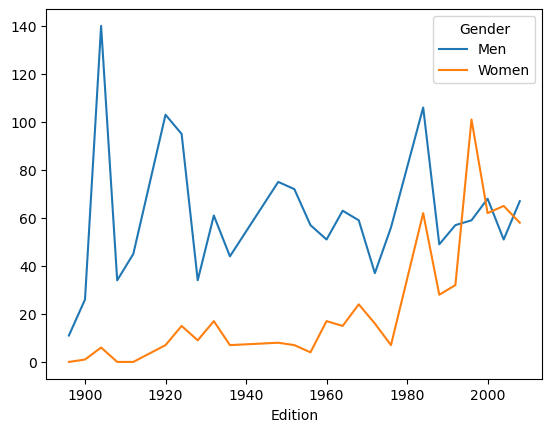

In [57]:
gu.groupby (['Edition', 'Gender']).size().unstack('Gender', fill_value =0).plot()

# Plot the 5 athletes who have won the most gold medals over the history of the Olympics. When there is a tie , consider the number of silver medals, then bronze medals. 

In [58]:
g = oo.groupby(['Athlete', 'Medal']).size()
g

Athlete                    Medal 
AABYE, Edgar               Gold      1
AALTONEN, Arvo Ossian      Bronze    2
AALTONEN, Paavo Johannes   Bronze    2
                           Gold      3
AAMODT, Ragnhild           Gold      1
                                    ..
ÖSTERVOLD, Kristian Olsen  Gold      1
ÖSTERVOLD, Ole Olsen       Gold      1
ÖSTMO, Ole                 Bronze    2
                           Silver    2
ÖSTRAND, Per-Olof          Bronze    1
Length: 25127, dtype: int64

In [61]:
g = oo.groupby(['Athlete', 'Medal']).size().unstack('Medal',fill_value=0)
g

Medal,Bronze,Gold,Silver
Athlete,,,
"AABYE, Edgar",0,1,0
"AALTONEN, Arvo Ossian",2,0,0
"AALTONEN, Paavo Johannes",2,3,0
"AAMODT, Ragnhild",0,1,0
"AANING, Alf Lied",0,0,1
...,...,...,...
"ÖSTERVOLD, Jan Olsen",0,1,0
"ÖSTERVOLD, Kristian Olsen",0,1,0
"ÖSTERVOLD, Ole Olsen",0,1,0


In [69]:
g.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)

Medal,Bronze,Gold,Silver
Athlete,,,
"PHELPS, Michael",2,14,0
"LATYNINA, Larisa",4,9,5
"NURMI, Paavo",0,9,3
"SPITZ, Mark",1,9,1
"LEWIS, Carl",0,9,1
...,...,...,...
"ZYCH, Boguslaw",1,0,0
"ZÄHRINGER, Klaus",1,0,0
"ZÜHLKE, Steffen",1,0,0


# In order to keep in same series like Gold, Silver, Bronze

In [68]:
g.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']]

Medal,Gold,Silver,Bronze
Athlete,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0
...,...,...,...
"ZYCH, Boguslaw",0,0,1
"ZÄHRINGER, Klaus",0,0,1
"ZÜHLKE, Steffen",0,0,1


<AxesSubplot:xlabel='Athlete'>

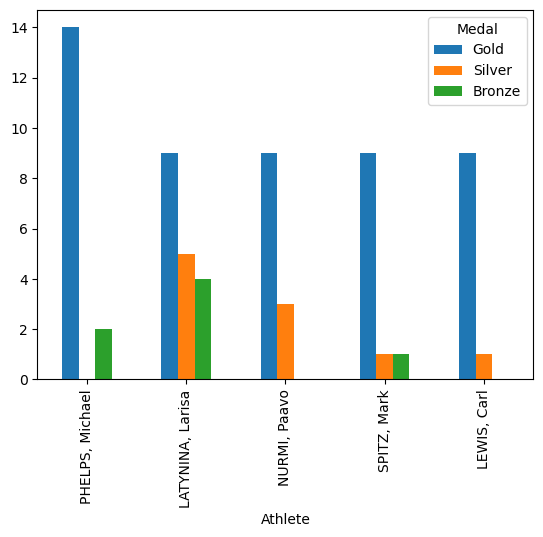

In [71]:
g.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']].head().plot(kind='bar')